# Baldwin-Philips-Terlevich Diagrams and Line Fitting

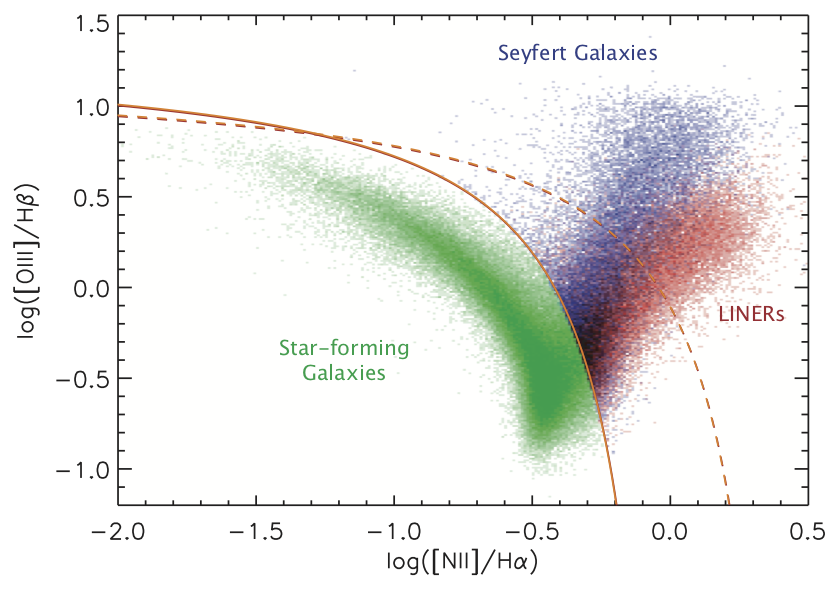

Baldwin-Philips-Terlovich (BPT) diagrams are one way we can use emission lines to classify galaxies.  Today, we are going to use BPT diagrams to classify the galaxy NGC6946 (Jessica's favorite!).  First, we will make our own BPT diagram using SDSS DR8 data, then we will determine the four line fluxes for NGC6946 using optical spectra from Lira et al, 2007 (https://ui.adsabs.harvard.edu/abs/2007MNRAS.382.1552L/abstract).  We will need to extract the H$\alpha$ ($\lambda = 6563\overset{\circ}{\rm{A}}$), H$\beta$ ($\lambda = 4861 \overset{\circ}{\rm{A}}$), [NII] ($\lambda = 6584 \overset{\circ}{\rm{A}}$), and [OII] ($\lambda = 5008 \overset{\circ}{\rm{A}}$) lines.  

First, let's import the tools we will use.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import pandas as pd
from astropy.modeling import models, fitting

Data from https://www.sdss.org/dr14/spectro/galaxy_mpajhu/
SDSS DR8 spectra properties

In [41]:
hdu = fits.open('abbrev_SDSSDR8')

We can see what information is in this file by printing the column names.

In [1]:
"""
cols = hdu[1].columns
cols.info
"""

'\ncols = hdu[1].columns\ncols.info\n'

Use the following code and the data you just loaded to replicate the plot pictured above with the SDSS DR8 data.  You'll need to add some data to the figure I've set up for you.  Make sure you match the x and y labels I've set up!

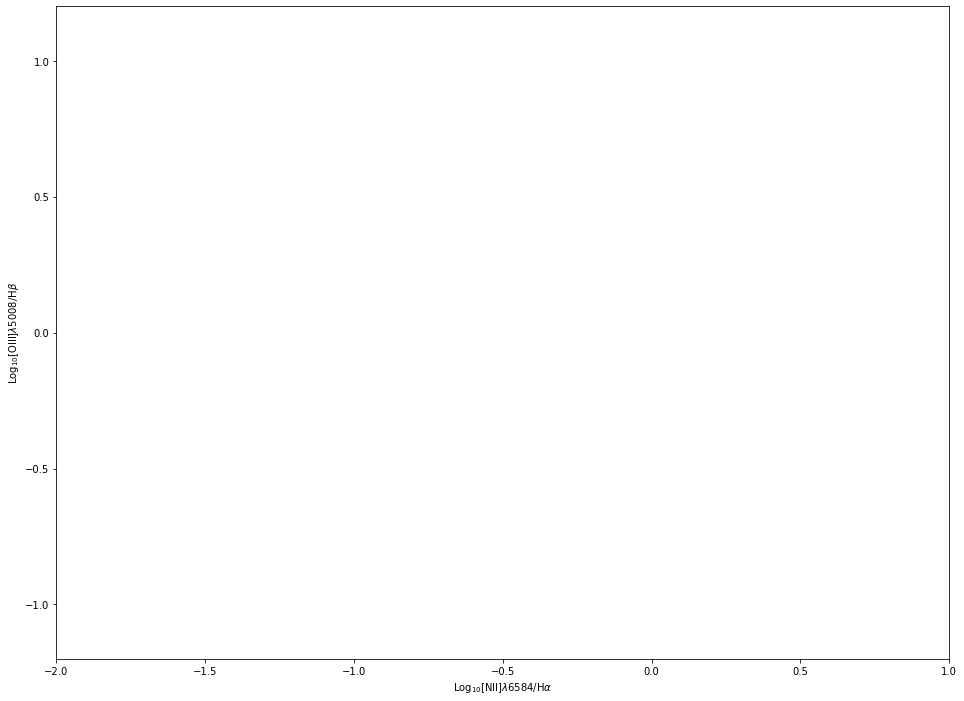

In [43]:
data = hdu[1].data
data = data[0:10000]
plt.figure(figsize=(16, 12))
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.2)
plt.xlabel('Log$_{10}$[NII]$\\lambda$6584/H$\\alpha$')
plt.ylabel('Log$_{10}$[OIII]$\\lambda$5008/H$\\beta$')
plt.show()

Now, let's add NGC6946!  First, load and examine the spectra from the Lira et al paper.

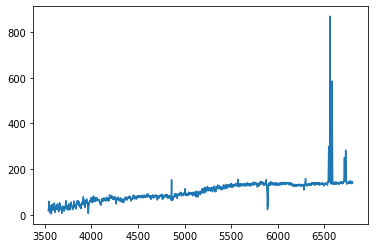

In [45]:
line = pd.read_csv('NGC_6946_Full_Opt_l2015.txt', delim_whitespace=True, comment='#')
plt.plot(line['Wavelength'], line['Flux'])
plt.show()

In order to determine fluxes, we are going to model each line as a gaussian.  We will need to make cut-outs of the data around each line, and subtract the underlying continuum to do this.  I've gone ahead and completed this process for H$\alpha$ with the following code.  You will need to repeat the process for H$\beta$, [NII], and [OIII]

In [46]:
model = models.Gaussian1D()
fit = fitting.LevMarLSQFitter()

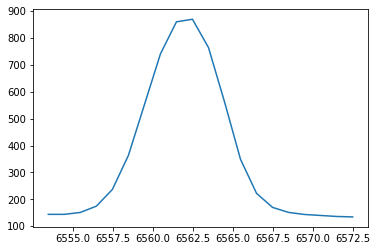

In [62]:
halpha = line[(line['Wavelength']>6553.0) & (line['Wavelength']<6573.0)]
plt.plot(halpha['Wavelength'], halpha['Flux'])
plt.show()


Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ----------------- ------------------- -----------------
    739.5020550886197 -3.0126194389693355 2.159652519221705


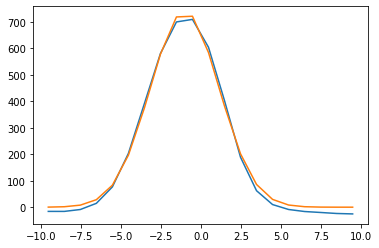

In [63]:
cont = line[(line['Wavelength']<6555.0) & (line['Wavelength']>6550.0)]
cont_flux = np.mean(cont['Flux'])
best_fit  = fit(model, halpha['Wavelength']-6565.0, halpha['Flux']-cont_flux)
print(best_fit)
plt.plot(halpha['Wavelength']-6563.0, halpha['Flux']-cont_flux)
plt.plot(halpha['Wavelength']-6563.0, best_fit(halpha['Wavelength']-6565.0))
plt.show()

We can now calculate the flux of this line using our gaussian fit by integrating under the curve.  The integral for a gaussian is:
$$ \sqrt{2 \pi  \sigma} \times a $$
where a is our amplitude.  

In [64]:
halpha_flux = np.sqrt(2.0*np.pi*best_fit.stddev)*best_fit.amplitude
print(halpha_flux)

2724.0887932750725


Now we have our H$\alpha$ flux!  Since we are only using ratios, I'm not going to worry about units.  Repeat this process for H$\beta$, [NII], and [OIII].

Once you have all four fluxes, re-make the BPT diagram and add NGC6946.  Referring to the figure at the top of this notebook, what type of galaxy do you think NGC6946 is?